# Intro

## Informações sobre as colunas:
- CLIENTNUM: Número do cliente. Identificador único do cliente titular da conta
- Attrition_Flag: (atividade do cliente) - se a conta for encerrada, então 1 senão 0
- Customer_Age: Idade do cliente em anos
- Gender: M=Masculino, F=Feminino
- Dependent_count: Número de dependentes
- Education_Level: Qualificação educacional do titular da conta (exemplo: ensino médio, superior completo, etc.)
- Marital_Status: Casado, Solteiro, Divorciado, Desconhecido
- Income_Category: Categoria de renda anual do titular da conta (< $ 40.000, $ 40.000 - 60.000, $ 60.000 - $ 80.000, $ 80.000-$ 120.000, > $ 120.000, Desconhecido)
- Card_Category: Tipo de cartão (Azul, Prata, Ouro, Platina)
- Months_on_book: Período de relacionamento com o banco
- Total_Relationship_Count: Número de produtos contratatados na plataforma do banco
- Months_Inactive_12_mon: Número de meses que a conta ficou inativa nos últimos 12 meses;
- Contacts_Count_12_mon:
- Credit_Limit: Limite de crédito que o cliente possui;
- Total_Revolving_Bal: Crédito rotativo, devedor. Quando o cliente não paga a fatura no tempo.
- Avg_Open_To_Buy: Média de crédito livre dos últimos 12 meses.
- Total_Amt_Chng_Q4_Q1:
- Total_Trans_Amt: Total transacionado na conta nos últimos 12 meses.
- Total_Trans_Ct: Quantidade de transações feitas nos últimos 12 meses.
- Total_Ct_Chng_Q4_Q1:
- Avg_Utilization_Ratio: Média de utilização do crédito. Exemplo: 0.15 significa que em 15% das vezes o cliente usa a função crédito do cartão.


In [ ]:
#importações:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, PredictionErrorDisplay
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/hugo451/dataset-cartao/main/BankChurners.csv")

display(df.tail())

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

# Análise Exploratória

In [ ]:
df = df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'NBC1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'NBC2'})

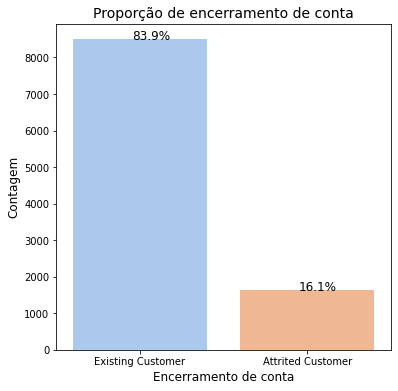

In [ ]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x='Attrition_Flag', data=df, palette='pastel')
plt.title('Proporção de encerramento de conta', fontsize=14)
plt.xlabel('Encerramento de conta', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

total = len(df['Attrition_Flag'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

plt.show()

- De inicio podemos ver que existe um desbalancemento entre as contas encerradas. Para resolver isso poderia diminuir a quantidade da classe majoritária ou fazer alguma técnica de gerar mais dados para a classe minoritária

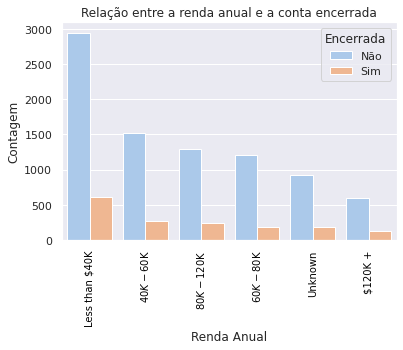

In [ ]:
# O encerramento da conta está ligado a baixa renda?

# criação do gráfico
sns.set(style='darkgrid')
sns.countplot(x='Income_Category', hue='Attrition_Flag',order=df['Income_Category'].value_counts().index, data=df, palette='pastel', dodge=True)

# personalização do gráfico
plt.title('Relação entre a renda anual e a conta encerrada')
plt.xlabel('Renda Anual')
plt.ylabel('Contagem')
plt.legend(title='Encerrada', loc='upper right', labels=['Não', 'Sim'])
plt.xticks(rotation=90, ha='center', fontsize=10, color='black')

# exibição do gráfico
plt.show()

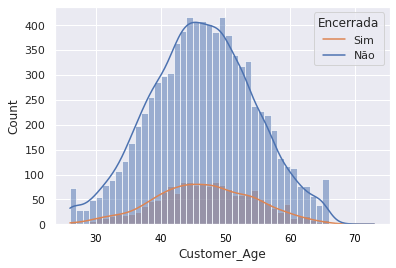

In [ ]:
# Qual a distribuição de idade dos clientes que encerraram a conta?
sns.histplot(x='Customer_Age', hue='Attrition_Flag', data=df, kde= True)
plt.legend(title='Encerrada', loc='upper right', labels=['Sim', 'Não'])
plt.xticks(ha='center', fontsize=10, color='black')
plt.show()

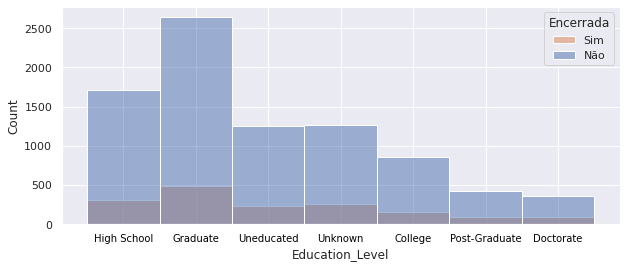

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(x='Education_Level', hue='Attrition_Flag', data=df)
plt.legend(title='Encerrada', loc='upper right', labels=['Sim', 'Não'])
plt.xticks(ha='center', fontsize=10, color='black')
plt.show()

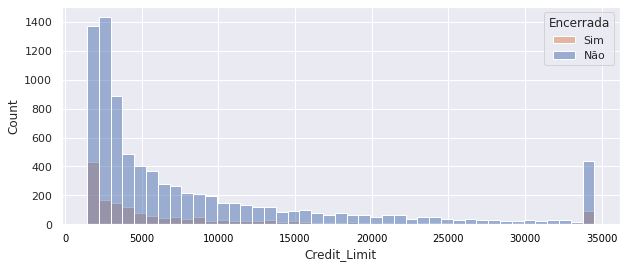

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(x='Credit_Limit', hue='Attrition_Flag', data=df)
plt.legend(title='Encerrada', loc='upper right', labels=['Sim', 'Não'])
plt.xticks(ha='center', fontsize=10, color='black')
plt.show()

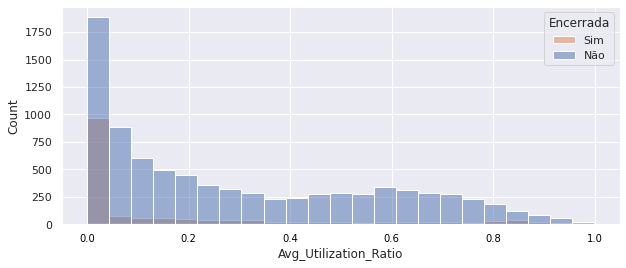

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(x='Avg_Utilization_Ratio', hue='Attrition_Flag', data=df)
plt.legend(title='Encerrada', loc='upper right', labels=['Sim', 'Não'])
plt.xticks(ha='center', fontsize=10, color='black')
plt.show()

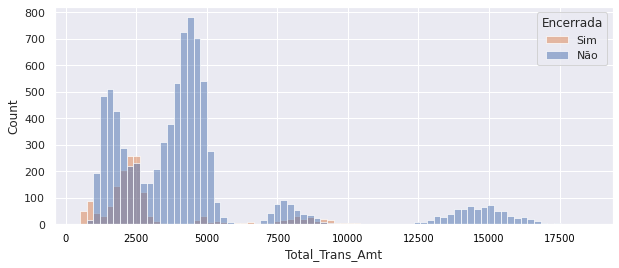

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(x='Total_Trans_Amt', hue='Attrition_Flag', data=df)
plt.legend(title='Encerrada', loc='upper right', labels=['Sim', 'Não'])
plt.xticks(ha='center', fontsize=10, color='black')
plt.show()

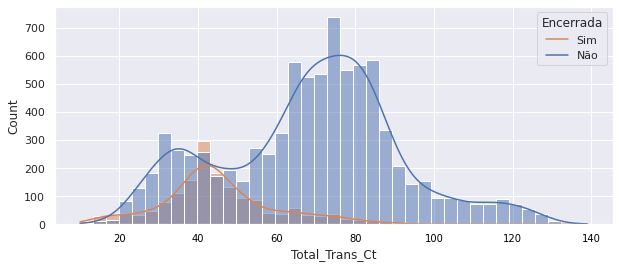

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(x='Total_Trans_Ct', hue='Attrition_Flag', data=df, kde = True)
plt.legend(title='Encerrada', loc='upper right', labels=['Sim', 'Não'])
plt.xticks(ha='center', fontsize=10, color='black')
plt.show()

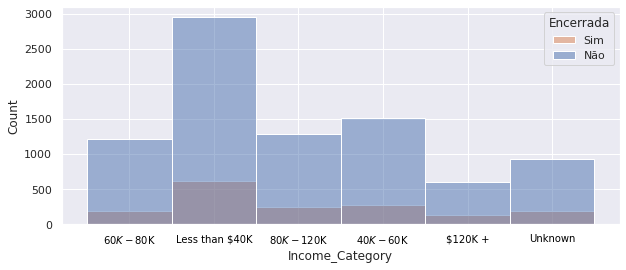

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(x='Income_Category', hue='Attrition_Flag', data=df)
plt.legend(title='Encerrada', loc='upper right', labels=['Sim', 'Não'])
plt.xticks(ha='center', fontsize=10, color='black')
plt.show()

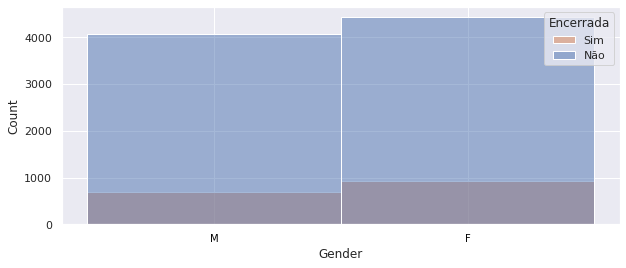

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(x='Gender', hue='Attrition_Flag', data=df)
plt.legend(title='Encerrada', loc='upper right', labels=['Sim', 'Não'])
plt.xticks(ha='center', fontsize=10, color='black')
plt.show()

# Tratamento dos dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
#Converte os dados do tipo string para int
lb = LabelEncoder()
df['Attrition_Flag'] = lb.fit_transform(df['Attrition_Flag'])
df['Gender'] = lb.fit_transform(df['Gender'])
df['Education_Level'] = lb.fit_transform(df['Education_Level'])
df['Marital_Status'] = lb.fit_transform(df['Marital_Status'])
df['Income_Category'] = lb.fit_transform(df['Income_Category'])
df['Card_Category'] = lb.fit_transform(df['Card_Category'])
display(df.tail())

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NBC1,NBC2
10122,772366833,1,50,1,2,2,2,1,0,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,0,41,1,2,6,0,1,0,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,0,44,0,1,3,1,4,0,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,0,30,1,2,2,3,1,0,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,0,43,0,2,2,1,4,3,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


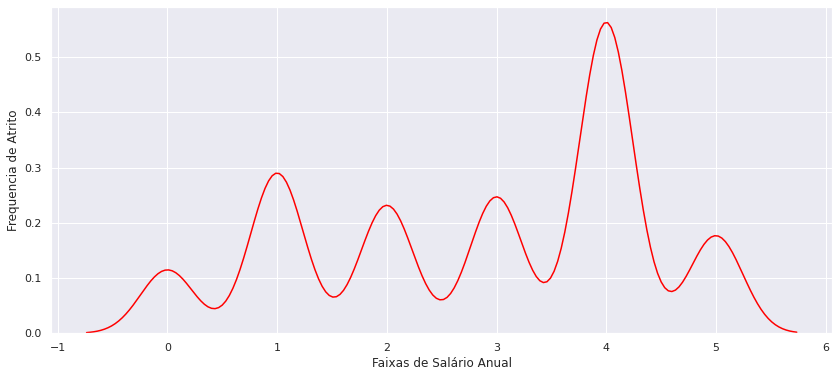

In [ ]:
fig, x = plt.subplots(figsize = (14,6))
sns.kdeplot(df[df["Attrition_Flag"]== 1]["Income_Category"], alpha=1,shade = False, color="red",x = x)
x.set_xlabel("Faixas de Salário Anual")
x.set_ylabel("Frequencia de Atrito")
plt.show()

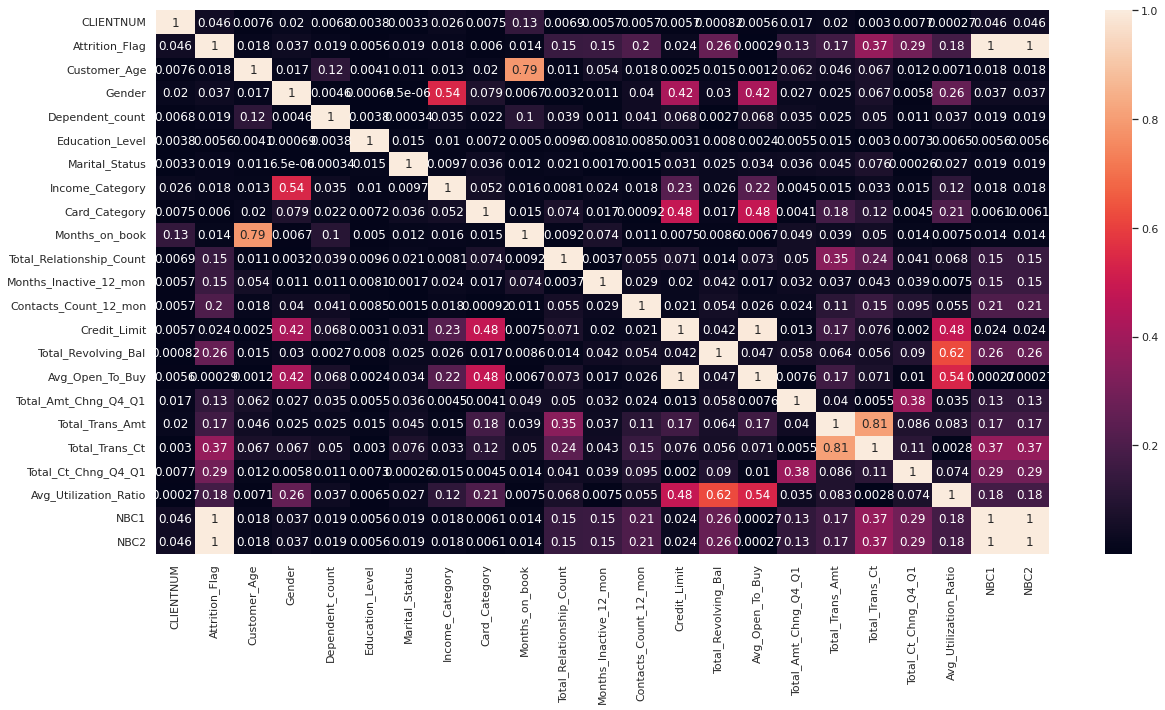

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(abs(df.corr()), annot=True)
plt.show()

In [ ]:
#Aplicando PCA nas colunas Customer_Age e Months_on_book e também para as colunas Total_Trans_Ct e Total_Trans_Amt
pca = PCA(n_components=1)
df_pca = df.drop(['Months_on_book', 'Customer_Age', 'Total_Trans_Ct', 'Total_Trans_Amt', 'NBC1', 'NBC2', 'CLIENTNUM'], axis=1)
df_pca["Total_Trans_Ct_X_Amt"] = pca.fit_transform(df[["Total_Trans_Ct" , "Total_Trans_Amt"]])
df_pca['Customer_Age_X_Months_on_book'] = pca.fit_transform(df[['Months_on_book', 'Customer_Age']])
display(df_pca.info())

#Months_on_book possui alta correlação com Customer_Age, portanto, é "dropada". Mesmo para Total_Trans_Ct e Total_Trans_Amt.
df = df.drop(['Months_on_book', 'Total_Trans_Ct'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Attrition_Flag                 10127 non-null  int64  
 1   Gender                         10127 non-null  int64  
 2   Dependent_count                10127 non-null  int64  
 3   Education_Level                10127 non-null  int64  
 4   Marital_Status                 10127 non-null  int64  
 5   Income_Category                10127 non-null  int64  
 6   Card_Category                  10127 non-null  int64  
 7   Total_Relationship_Count       10127 non-null  int64  
 8   Months_Inactive_12_mon         10127 non-null  int64  
 9   Contacts_Count_12_mon          10127 non-null  int64  
 10  Credit_Limit                   10127 non-null  float64
 11  Total_Revolving_Bal            10127 non-null  int64  
 12  Avg_Open_To_Buy                10127 non-null 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
#O resto do tratamento (normalização, balanceamento de classes, etc.) depende de qual modelo será feito e que colunas serão utilizadas.
#Decidir abordagens e métodos à serem utilizados.
#Sugestão: Classificar Possíveis encerramentos de conta, Fazer uma regressão para mensurar um possível valor para crédito.

# Random Forest


In [ ]:
y = df['Attrition_Flag']

X= df.drop(['Attrition_Flag', 'NBC1', 'NBC2', 'CLIENTNUM'], axis = 1)

In [ ]:
print(f'X : {X.shape}')

X : (10127, 17)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (6785, 17)
y_train : (6785,)
X_test : (3342, 17)
y_test : (3342,)


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 250, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
param_distributions = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_distributions)

{'n_estimators': [20, 45, 71, 96, 122, 147, 173, 198, 224, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
modelo = RandomForestClassifier()

In [ ]:
rf_Random = RandomizedSearchCV(estimator = modelo, param_distributions = param_distributions,n_iter = 100, cv = 3, verbose=2,random_state=42, n_jobs = -1)

In [ ]:
rf_Random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 45, 71, 96, 122,
                                                         147, 173, 198, 224,
                                                         250]},
                   random_state=42, verbose=2)

In [ ]:
rf_Random.best_params_

{'n_estimators': 224,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [ ]:
y_pred = rf_Random.predict(X_test)

In [ ]:
print(f'Classification_report: \n\n {classification_report(y_test,y_pred)}')

Classification_report: 

               precision    recall  f1-score   support

           0       0.90      0.77      0.83       541
           1       0.96      0.98      0.97      2801

    accuracy                           0.95      3342
   macro avg       0.93      0.88      0.90      3342
weighted avg       0.95      0.95      0.95      3342



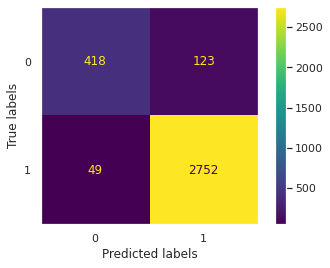

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.grid(False)
plt.show()

# Random Forest com dados equilibrados utilizando Smote

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

In [ ]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              17000 non-null  int64  
 1   Gender                    17000 non-null  int64  
 2   Dependent_count           17000 non-null  int64  
 3   Education_Level           17000 non-null  int64  
 4   Marital_Status            17000 non-null  int64  
 5   Income_Category           17000 non-null  int64  
 6   Card_Category             17000 non-null  int64  
 7   Total_Relationship_Count  17000 non-null  int64  
 8   Months_Inactive_12_mon    17000 non-null  int64  
 9   Contacts_Count_12_mon     17000 non-null  int64  
 10  Credit_Limit              17000 non-null  float64
 11  Total_Revolving_Bal       17000 non-null  int64  
 12  Avg_Open_To_Buy           17000 non-null  float64
 13  Total_Amt_Chng_Q4_Q1      17000 non-null  float64
 14  Total_

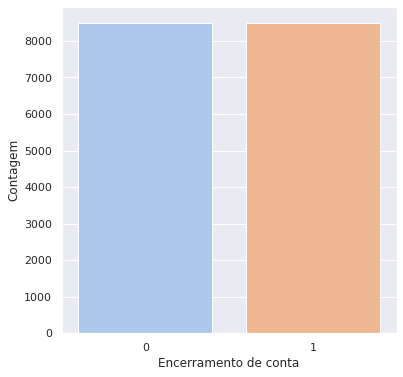

In [ ]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x='Attrition_Flag', data=df_resampled, palette='pastel')
plt.xlabel('Encerramento de conta', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

plt.show()

In [ ]:
y_resampled = df_resampled['Attrition_Flag']

X_resampled = df_resampled.drop(['Attrition_Flag'], axis = 1)

In [ ]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

In [ ]:
print(f'X_train : {X_resampled_train.shape}')
print(f'y_train : {y_resampled_train.shape}')
print(f'X_test : {X_resampled_test.shape}')
print(f'y_test : {y_resampled_test.shape}')

X_train : (11390, 17)
y_train : (11390,)
X_test : (5610, 17)
y_test : (5610,)


In [ ]:
rf_Random.fit(X_resampled_train, y_resampled_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 45, 71, 96, 122,
                                                         147, 173, 198, 224,
                                                         250]},
                   random_state=42, verbose=2)

In [ ]:
rf_Random.best_params_

{'n_estimators': 224,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [ ]:
y_resampled_pred = rf_Random.predict(X_resampled_test)

In [ ]:
print(f'Classification_report: \n\n {classification_report(y_resampled_test,y_resampled_pred)}')

Classification_report: 

               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2792
           1       0.97      0.97      0.97      2818

    accuracy                           0.97      5610
   macro avg       0.97      0.97      0.97      5610
weighted avg       0.97      0.97      0.97      5610



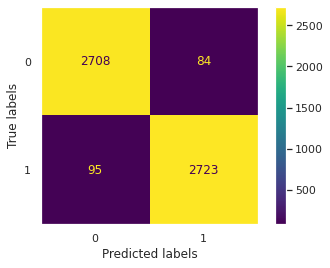

In [ ]:
cm_resampled = confusion_matrix(y_resampled_test, y_resampled_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_resampled)
disp.plot()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.grid(False)
plt.show()

# Regressão para definição de valor de crédito

In [ ]:
#Definindo conjuntos de entradas e saída
X = df_pca.drop(["Credit_Limit"], axis=1)
y = df_pca["Credit_Limit"]

#Definindo conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Regressão utilizando KNNRegressor (K Nearest Neighbors Regressor)

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=5, weights = "distance")
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(weights='distance')

In [ ]:
y_pred = knn_reg.predict(X_test)

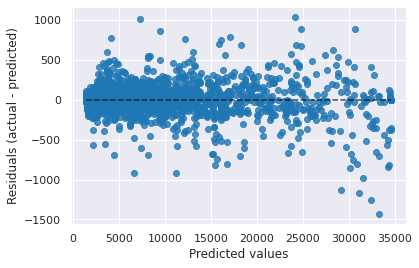

In [ ]:
error_plot = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
error_plot.plot()

In [ ]:
error = pd.DataFrame({'Erros': {"MAE": mean_absolute_error(y_test, y_pred), "MSE": mean_squared_error(y_test, y_pred), "MAPE": mean_absolute_percentage_error(y_test, y_pred)}})
display(error)

,Erros
MAE,91.856275
MAPE,0.015610
MSE,25926.958631


## Regressão utilizando MLPRegressor (Multi Layered Perceptron Regressor)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7088 entries, 415 to 7270
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Attrition_Flag                 7088 non-null   int64  
 1   Gender                         7088 non-null   int64  
 2   Dependent_count                7088 non-null   int64  
 3   Education_Level                7088 non-null   int64  
 4   Marital_Status                 7088 non-null   int64  
 5   Income_Category                7088 non-null   int64  
 6   Card_Category                  7088 non-null   int64  
 7   Total_Relationship_Count       7088 non-null   int64  
 8   Months_Inactive_12_mon         7088 non-null   int64  
 9   Contacts_Count_12_mon          7088 non-null   int64  
 10  Total_Revolving_Bal            7088 non-null   int64  
 11  Avg_Open_To_Buy                7088 non-null   float64
 12  Total_Amt_Chng_Q4_Q1           7088 non-null  

In [ ]:
sc=StandardScaler()

scaler = sc.fit(X_train[['Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Trans_Ct_X_Amt', 'Customer_Age_X_Months_on_book']])
X_train[['Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Trans_Ct_X_Amt', 'Customer_Age_X_Months_on_book']] = scaler.transform(X_train[['Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Trans_Ct_X_Amt', 'Customer_Age_X_Months_on_book']])
X_test[['Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Trans_Ct_X_Amt', 'Customer_Age_X_Months_on_book']] = scaler.transform(X_test[['Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Trans_Ct_X_Amt', 'Customer_Age_X_Months_on_book']])

In [ ]:
X_train.tail()

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Total_Trans_Ct_X_Amt,Customer_Age_X_Months_on_book
5734,0,0,1,2,2,1,0,3,2,5,2517,-0.645567,0.227112,0.510006,1.219615,-0.678643,-0.016312
5191,0,0,3,3,0,5,0,4,3,6,0,0.054227,-0.969134,-1.682240,-0.996749,-0.630841,0.444126
5390,1,0,4,2,3,4,0,3,1,2,1547,-0.740660,0.203929,1.212702,1.441981,0.067175,-0.539912
860,1,1,3,6,2,1,0,4,1,1,1707,-0.619964,-1.177782,-1.682240,0.749367,-0.858860,-0.932770
7270,1,1,4,3,2,2,0,5,1,2,0,-0.398078,-0.417377,-0.411495,-0.996749,0.007519,1.293950


In [ ]:
reg = MLPRegressor(hidden_layer_sizes= (100, 150, 200, 150, 100), activation= 'relu',
                  solver='adam', learning_rate_init=0.005, learning_rate='adaptive',
                  early_stopping=True, n_iter_no_change=10, tol=0.001,
                  random_state=1, max_iter=500)
reg.fit(X_train, y_train)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 150, 200, 150, 100),
             learning_rate='adaptive', learning_rate_init=0.005, max_iter=500,
             random_state=1, tol=0.001)

In [ ]:
y_pred = reg.predict(X_test)

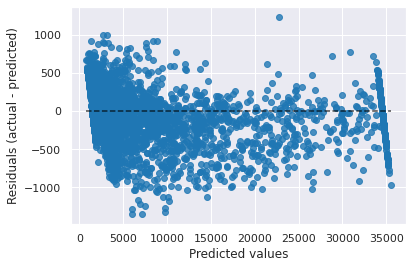

In [ ]:
error_plot = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
error_plot.plot()

In [ ]:
error = pd.DataFrame({'Erros': {"MAE": mean_absolute_error(y_test, y_pred), "MSE": mean_squared_error(y_test, y_pred), "MAPE": mean_absolute_percentage_error(y_test, y_pred)}})
display(error)

,Erros
MAE,285.101973
MAPE,0.069986
MSE,137239.612202


## Regressão usando Linear Regression

In [ ]:
lreg = LinearRegression().fit(X_train, y_train)
y_pred = lreg.predict(X_test)

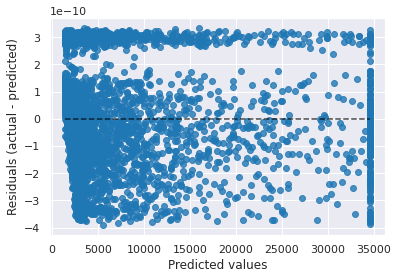

In [ ]:
error_plot = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
error_plot.plot()

In [ ]:
error = pd.DataFrame({'Erros': {"MAE": mean_absolute_error(y_test, y_pred), "MSE": mean_squared_error(y_test, y_pred), "MAPE": mean_absolute_percentage_error(y_test, y_pred)}})
display(error)

,Erros
MAE,1.783768e-10
MAPE,4.688418e-14
MSE,4.441528e-20
